In [9]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector

https://learn.qiskit.org/course/introduction/entangled-states#entangled-39-0

We'll now look at an example of entanglement in action using a protocol for quantum communication. For classical communication there is a fundamental limit on how much information we can send with a given number of bits. By definition, we can send no more than n bits of information when we send n bits. For quantum information, much the same rule applies: no more than n bits of information can be reliably encoded and retrieved from n qubits. 

However, there are ways that we can push the boundaries to do things that are not possible classically, and for that we require entanglement. Here we will look at one such example, in which transferring one qubit can allow a two bit message to be sent.

Suppose we have two people: Alice and Bob. Alice wishes to send a two bit message to Bob - 00, 01, 10 or 11 - and wants to do it by sending qubits.

The simplest way to do this is with two qubits. Alice can simply use the qubits to encode the bit values, applying an x to flip them for a 1 state.

In [6]:
# The message
MESSAGE = '01'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
# Los indices son negativos porque en qiskit el orden va de derecha a izquierda
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

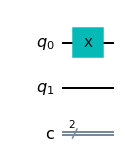

In [7]:
qc_alice.draw('mpl')

In [12]:
Statevector(qc_alice).draw('latex')

<IPython.core.display.Latex object>

After Alice sends the qubits to Bob, all the needs to do is mesaure them.

In [11]:
backend = Aer.get_backend('aer_simulator')

# Bob Measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'01': 1024}

The result Bob gets out will be exactly the same that Alice put in. 

We notice that this protocol did not involve any entenglement. One way to insert it would be for Alice to add H-gate and CX-gates after encoding the information. Let's look at the states that are create by these gates.

In [13]:
MESAGGE = '01'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1] == '1':
    qc_alice.x(0)
if MESSAGE[-2] == '1':
    qc_alice.x(1)
    
# Then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

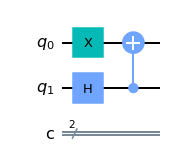

In [14]:
qc_alice.draw('mpl')

When Bob receives these states he needs to disentangle them, by undoing the H-gate and cx-gate. Then he can measure and retrieve the message as before.

Para un estado 00 el estado creado es $|\phi^+> = \frac{1}{\sqrt{2}}(|00> + |11>))$,

Para un estado 01 el estado creado es $|\chi^+> = \frac{1}{\sqrt{2}}(|01> + |10>))$,

Para un estado 10 el estado creado es $|\phi^-> = \frac{1}{\sqrt{2}}(|00> - |11>))$,

Para un estado 11 el estado creado es $|\chi^-> = \frac{1}{\sqrt{2}}(|01> - |10>))$,

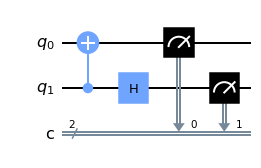

In [18]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangled
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw('mpl')

In [22]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

ket = Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

In [23]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'01': 1024}